In [2]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
import pickle
import xgboost as xgb
import shap
import sklearn


C:\Users\sid\Anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [3]:
with open('Activity_6_01_data.pkl','rb') as f:
    feature_response, X_train_all, y_train_all, X_test_all,\
            y_test_all = pickle.load(f)

In [4]:
xgb_model_4 = xgb.XGBClassifier(n_estimators = 1000,
                                max_depth = 0,
                                learning_rate = 0.1,
                                verbosity = 1,
                                objective = 'binary:logistic',
                                use_label_encoder = False,
                                n_jobs = -1,
                                tree_method = 'hist',
                                grow_policy = 'lossguide'
                                )

In [5]:
x_train_2, x_val_2,y_train_2,y_val_2 = train_test_split(X_train_all, y_train_all, \
                                                        test_size=0.2, random_state =24)

In [6]:
max_leaves_values = list(range(1,5,1))


In [7]:
eval_set_3  = [(x_train_2,y_train_2),(x_val_2,y_val_2)]

In [8]:
val_aucs = []

for max_leave in max_leaves_values:
    xgb_model_4.set_params(**{'max_leaves':max_leave})
    
    xgb_model_4.fit(x_train_2, y_train_2, eval_set=eval_set_3, eval_metric='auc', early_stopping_rounds=30)
    
    
    val_pred_prob = xgb_model_4.predict_proba(x_val_2)[:,1]
    val_aucs.append(roc_auc_score(y_val_2,val_pred_prob))

[0]	validation_0-auc:0.50000	validation_1-auc:0.50000
[1]	validation_0-auc:0.50000	validation_1-auc:0.50000
[2]	validation_0-auc:0.50000	validation_1-auc:0.50000
[3]	validation_0-auc:0.50000	validation_1-auc:0.50000
[4]	validation_0-auc:0.50000	validation_1-auc:0.50000
[5]	validation_0-auc:0.50000	validation_1-auc:0.50000
[6]	validation_0-auc:0.50000	validation_1-auc:0.50000
[7]	validation_0-auc:0.50000	validation_1-auc:0.50000
[8]	validation_0-auc:0.50000	validation_1-auc:0.50000
[9]	validation_0-auc:0.50000	validation_1-auc:0.50000
[10]	validation_0-auc:0.50000	validation_1-auc:0.50000
[11]	validation_0-auc:0.50000	validation_1-auc:0.50000
[12]	validation_0-auc:0.50000	validation_1-auc:0.50000
[13]	validation_0-auc:0.50000	validation_1-auc:0.50000
[14]	validation_0-auc:0.50000	validation_1-auc:0.50000
[15]	validation_0-auc:0.50000	validation_1-auc:0.50000
[16]	validation_0-auc:0.50000	validation_1-auc:0.50000
[17]	validation_0-auc:0.50000	validation_1-auc:0.50000
[18]	validation_0-au

[118]	validation_0-auc:0.76178	validation_1-auc:0.75175
[119]	validation_0-auc:0.76190	validation_1-auc:0.75172
[120]	validation_0-auc:0.76202	validation_1-auc:0.75170
[121]	validation_0-auc:0.76218	validation_1-auc:0.75186
[122]	validation_0-auc:0.76227	validation_1-auc:0.75192
[123]	validation_0-auc:0.76228	validation_1-auc:0.75193
[124]	validation_0-auc:0.76249	validation_1-auc:0.75175
[125]	validation_0-auc:0.76245	validation_1-auc:0.75157
[126]	validation_0-auc:0.76256	validation_1-auc:0.75164
[127]	validation_0-auc:0.76263	validation_1-auc:0.75179
[128]	validation_0-auc:0.76283	validation_1-auc:0.75192
[129]	validation_0-auc:0.76293	validation_1-auc:0.75196
[130]	validation_0-auc:0.76282	validation_1-auc:0.75199
[131]	validation_0-auc:0.76289	validation_1-auc:0.75212
[132]	validation_0-auc:0.76313	validation_1-auc:0.75211
[133]	validation_0-auc:0.76320	validation_1-auc:0.75226
[134]	validation_0-auc:0.76331	validation_1-auc:0.75236
[135]	validation_0-auc:0.76345	validation_1-auc:

[265]	validation_0-auc:0.77075	validation_1-auc:0.75789
[266]	validation_0-auc:0.77089	validation_1-auc:0.75792
[267]	validation_0-auc:0.77092	validation_1-auc:0.75806
[268]	validation_0-auc:0.77095	validation_1-auc:0.75811
[269]	validation_0-auc:0.77107	validation_1-auc:0.75830
[270]	validation_0-auc:0.77109	validation_1-auc:0.75822
[271]	validation_0-auc:0.77104	validation_1-auc:0.75806
[272]	validation_0-auc:0.77117	validation_1-auc:0.75811
[273]	validation_0-auc:0.77119	validation_1-auc:0.75815
[274]	validation_0-auc:0.77125	validation_1-auc:0.75827
[275]	validation_0-auc:0.77128	validation_1-auc:0.75831
[276]	validation_0-auc:0.77130	validation_1-auc:0.75838
[277]	validation_0-auc:0.77133	validation_1-auc:0.75843
[278]	validation_0-auc:0.77134	validation_1-auc:0.75848
[279]	validation_0-auc:0.77135	validation_1-auc:0.75850
[280]	validation_0-auc:0.77138	validation_1-auc:0.75856
[281]	validation_0-auc:0.77143	validation_1-auc:0.75849
[282]	validation_0-auc:0.77146	validation_1-auc:

[412]	validation_0-auc:0.77485	validation_1-auc:0.76165
[413]	validation_0-auc:0.77487	validation_1-auc:0.76172
[414]	validation_0-auc:0.77493	validation_1-auc:0.76177
[415]	validation_0-auc:0.77494	validation_1-auc:0.76176
[416]	validation_0-auc:0.77495	validation_1-auc:0.76175
[417]	validation_0-auc:0.77501	validation_1-auc:0.76179
[418]	validation_0-auc:0.77499	validation_1-auc:0.76179
[419]	validation_0-auc:0.77508	validation_1-auc:0.76191
[420]	validation_0-auc:0.77508	validation_1-auc:0.76194
[421]	validation_0-auc:0.77508	validation_1-auc:0.76197
[422]	validation_0-auc:0.77512	validation_1-auc:0.76198
[423]	validation_0-auc:0.77514	validation_1-auc:0.76201
[424]	validation_0-auc:0.77512	validation_1-auc:0.76192
[425]	validation_0-auc:0.77518	validation_1-auc:0.76195
[426]	validation_0-auc:0.77522	validation_1-auc:0.76202
[427]	validation_0-auc:0.77524	validation_1-auc:0.76203
[428]	validation_0-auc:0.77526	validation_1-auc:0.76207
[429]	validation_0-auc:0.77528	validation_1-auc:

[559]	validation_0-auc:0.77736	validation_1-auc:0.76411
[560]	validation_0-auc:0.77734	validation_1-auc:0.76410
[561]	validation_0-auc:0.77738	validation_1-auc:0.76410
[562]	validation_0-auc:0.77739	validation_1-auc:0.76411
[563]	validation_0-auc:0.77736	validation_1-auc:0.76410
[564]	validation_0-auc:0.77737	validation_1-auc:0.76415
[565]	validation_0-auc:0.77737	validation_1-auc:0.76414
[566]	validation_0-auc:0.77740	validation_1-auc:0.76413
[567]	validation_0-auc:0.77741	validation_1-auc:0.76408
[568]	validation_0-auc:0.77744	validation_1-auc:0.76412
[569]	validation_0-auc:0.77746	validation_1-auc:0.76412
[570]	validation_0-auc:0.77750	validation_1-auc:0.76407
[571]	validation_0-auc:0.77751	validation_1-auc:0.76412
[572]	validation_0-auc:0.77751	validation_1-auc:0.76416
[573]	validation_0-auc:0.77751	validation_1-auc:0.76420
[574]	validation_0-auc:0.77753	validation_1-auc:0.76424
[575]	validation_0-auc:0.77753	validation_1-auc:0.76424
[576]	validation_0-auc:0.77757	validation_1-auc:

[705]	validation_0-auc:0.77897	validation_1-auc:0.76525
[706]	validation_0-auc:0.77898	validation_1-auc:0.76526
[707]	validation_0-auc:0.77901	validation_1-auc:0.76523
[708]	validation_0-auc:0.77902	validation_1-auc:0.76527
[709]	validation_0-auc:0.77901	validation_1-auc:0.76522
[710]	validation_0-auc:0.77902	validation_1-auc:0.76523
[711]	validation_0-auc:0.77902	validation_1-auc:0.76524
[712]	validation_0-auc:0.77903	validation_1-auc:0.76522
[713]	validation_0-auc:0.77901	validation_1-auc:0.76518
[714]	validation_0-auc:0.77903	validation_1-auc:0.76518
[715]	validation_0-auc:0.77902	validation_1-auc:0.76518
[716]	validation_0-auc:0.77905	validation_1-auc:0.76518
[717]	validation_0-auc:0.77906	validation_1-auc:0.76517
[718]	validation_0-auc:0.77908	validation_1-auc:0.76519
[719]	validation_0-auc:0.77908	validation_1-auc:0.76518
[720]	validation_0-auc:0.77910	validation_1-auc:0.76516
[721]	validation_0-auc:0.77911	validation_1-auc:0.76516
[722]	validation_0-auc:0.77914	validation_1-auc:

[0]	validation_0-auc:0.63173	validation_1-auc:0.63367
[1]	validation_0-auc:0.63173	validation_1-auc:0.63367
[2]	validation_0-auc:0.63173	validation_1-auc:0.63367
[3]	validation_0-auc:0.68027	validation_1-auc:0.68276
[4]	validation_0-auc:0.68027	validation_1-auc:0.68276
[5]	validation_0-auc:0.68027	validation_1-auc:0.68276
[6]	validation_0-auc:0.68027	validation_1-auc:0.68276
[7]	validation_0-auc:0.68027	validation_1-auc:0.68276
[8]	validation_0-auc:0.68027	validation_1-auc:0.68276
[9]	validation_0-auc:0.68027	validation_1-auc:0.68276
[10]	validation_0-auc:0.68027	validation_1-auc:0.68276
[11]	validation_0-auc:0.69696	validation_1-auc:0.69290
[12]	validation_0-auc:0.69696	validation_1-auc:0.69290
[13]	validation_0-auc:0.69696	validation_1-auc:0.69290
[14]	validation_0-auc:0.69696	validation_1-auc:0.69290
[15]	validation_0-auc:0.69696	validation_1-auc:0.69290
[16]	validation_0-auc:0.72154	validation_1-auc:0.71322
[17]	validation_0-auc:0.72154	validation_1-auc:0.71322
[18]	validation_0-au

[149]	validation_0-auc:0.76456	validation_1-auc:0.75318
[150]	validation_0-auc:0.76459	validation_1-auc:0.75315
[151]	validation_0-auc:0.76479	validation_1-auc:0.75319
[152]	validation_0-auc:0.76471	validation_1-auc:0.75313
[153]	validation_0-auc:0.76474	validation_1-auc:0.75321
[154]	validation_0-auc:0.76494	validation_1-auc:0.75315
[155]	validation_0-auc:0.76506	validation_1-auc:0.75333
[156]	validation_0-auc:0.76511	validation_1-auc:0.75343
[157]	validation_0-auc:0.76520	validation_1-auc:0.75344
[158]	validation_0-auc:0.76530	validation_1-auc:0.75353
[159]	validation_0-auc:0.76536	validation_1-auc:0.75357
[160]	validation_0-auc:0.76533	validation_1-auc:0.75355
[161]	validation_0-auc:0.76539	validation_1-auc:0.75363
[162]	validation_0-auc:0.76548	validation_1-auc:0.75379
[163]	validation_0-auc:0.76553	validation_1-auc:0.75367
[164]	validation_0-auc:0.76570	validation_1-auc:0.75360
[165]	validation_0-auc:0.76565	validation_1-auc:0.75345
[166]	validation_0-auc:0.76572	validation_1-auc:

[296]	validation_0-auc:0.77197	validation_1-auc:0.75878
[297]	validation_0-auc:0.77198	validation_1-auc:0.75889
[298]	validation_0-auc:0.77203	validation_1-auc:0.75896
[299]	validation_0-auc:0.77202	validation_1-auc:0.75891
[300]	validation_0-auc:0.77201	validation_1-auc:0.75888
[301]	validation_0-auc:0.77203	validation_1-auc:0.75876
[302]	validation_0-auc:0.77205	validation_1-auc:0.75866
[303]	validation_0-auc:0.77205	validation_1-auc:0.75876
[304]	validation_0-auc:0.77216	validation_1-auc:0.75895
[305]	validation_0-auc:0.77223	validation_1-auc:0.75899
[306]	validation_0-auc:0.77221	validation_1-auc:0.75899
[307]	validation_0-auc:0.77226	validation_1-auc:0.75907
[308]	validation_0-auc:0.77231	validation_1-auc:0.75909
[309]	validation_0-auc:0.77235	validation_1-auc:0.75913
[310]	validation_0-auc:0.77236	validation_1-auc:0.75917
[311]	validation_0-auc:0.77247	validation_1-auc:0.75921
[312]	validation_0-auc:0.77240	validation_1-auc:0.75917
[313]	validation_0-auc:0.77241	validation_1-auc:

[443]	validation_0-auc:0.77550	validation_1-auc:0.76227
[444]	validation_0-auc:0.77548	validation_1-auc:0.76237
[445]	validation_0-auc:0.77554	validation_1-auc:0.76238
[446]	validation_0-auc:0.77556	validation_1-auc:0.76243
[447]	validation_0-auc:0.77557	validation_1-auc:0.76244
[448]	validation_0-auc:0.77555	validation_1-auc:0.76243
[449]	validation_0-auc:0.77557	validation_1-auc:0.76243
[450]	validation_0-auc:0.77559	validation_1-auc:0.76241
[451]	validation_0-auc:0.77564	validation_1-auc:0.76247
[452]	validation_0-auc:0.77571	validation_1-auc:0.76254
[453]	validation_0-auc:0.77571	validation_1-auc:0.76251
[454]	validation_0-auc:0.77573	validation_1-auc:0.76256
[455]	validation_0-auc:0.77575	validation_1-auc:0.76257
[456]	validation_0-auc:0.77573	validation_1-auc:0.76249
[457]	validation_0-auc:0.77580	validation_1-auc:0.76264
[458]	validation_0-auc:0.77582	validation_1-auc:0.76254
[459]	validation_0-auc:0.77577	validation_1-auc:0.76254
[460]	validation_0-auc:0.77581	validation_1-auc:

[590]	validation_0-auc:0.77774	validation_1-auc:0.76443
[591]	validation_0-auc:0.77775	validation_1-auc:0.76436
[592]	validation_0-auc:0.77775	validation_1-auc:0.76434
[593]	validation_0-auc:0.77775	validation_1-auc:0.76435
[594]	validation_0-auc:0.77776	validation_1-auc:0.76438
[595]	validation_0-auc:0.77777	validation_1-auc:0.76438
[596]	validation_0-auc:0.77777	validation_1-auc:0.76435
[597]	validation_0-auc:0.77778	validation_1-auc:0.76436
[598]	validation_0-auc:0.77784	validation_1-auc:0.76444
[599]	validation_0-auc:0.77784	validation_1-auc:0.76437
[600]	validation_0-auc:0.77785	validation_1-auc:0.76438
[601]	validation_0-auc:0.77786	validation_1-auc:0.76441
[602]	validation_0-auc:0.77787	validation_1-auc:0.76441
[603]	validation_0-auc:0.77790	validation_1-auc:0.76445
[604]	validation_0-auc:0.77791	validation_1-auc:0.76446
[605]	validation_0-auc:0.77792	validation_1-auc:0.76446
[606]	validation_0-auc:0.77791	validation_1-auc:0.76449
[607]	validation_0-auc:0.77794	validation_1-auc:

[737]	validation_0-auc:0.77923	validation_1-auc:0.76525
[738]	validation_0-auc:0.77927	validation_1-auc:0.76524
[739]	validation_0-auc:0.77927	validation_1-auc:0.76527
[740]	validation_0-auc:0.77929	validation_1-auc:0.76526
[741]	validation_0-auc:0.77929	validation_1-auc:0.76533
[742]	validation_0-auc:0.77928	validation_1-auc:0.76532
[743]	validation_0-auc:0.77929	validation_1-auc:0.76537
[744]	validation_0-auc:0.77931	validation_1-auc:0.76534
[745]	validation_0-auc:0.77932	validation_1-auc:0.76535
[746]	validation_0-auc:0.77933	validation_1-auc:0.76534
[747]	validation_0-auc:0.77934	validation_1-auc:0.76532
[748]	validation_0-auc:0.77934	validation_1-auc:0.76531
[749]	validation_0-auc:0.77936	validation_1-auc:0.76534
[750]	validation_0-auc:0.77939	validation_1-auc:0.76537
[751]	validation_0-auc:0.77940	validation_1-auc:0.76534
[752]	validation_0-auc:0.77940	validation_1-auc:0.76538
[753]	validation_0-auc:0.77940	validation_1-auc:0.76538
[754]	validation_0-auc:0.77942	validation_1-auc:

[33]	validation_0-auc:0.74596	validation_1-auc:0.73922
[34]	validation_0-auc:0.74668	validation_1-auc:0.74000
[35]	validation_0-auc:0.74784	validation_1-auc:0.74010
[36]	validation_0-auc:0.74784	validation_1-auc:0.74010
[37]	validation_0-auc:0.74783	validation_1-auc:0.74038
[38]	validation_0-auc:0.74834	validation_1-auc:0.74121
[39]	validation_0-auc:0.74907	validation_1-auc:0.74279
[40]	validation_0-auc:0.74907	validation_1-auc:0.74279
[41]	validation_0-auc:0.74935	validation_1-auc:0.74300
[42]	validation_0-auc:0.74938	validation_1-auc:0.74301
[43]	validation_0-auc:0.75002	validation_1-auc:0.74394
[44]	validation_0-auc:0.74989	validation_1-auc:0.74401
[45]	validation_0-auc:0.74956	validation_1-auc:0.74354
[46]	validation_0-auc:0.74972	validation_1-auc:0.74374
[47]	validation_0-auc:0.75035	validation_1-auc:0.74384
[48]	validation_0-auc:0.75092	validation_1-auc:0.74443
[49]	validation_0-auc:0.75092	validation_1-auc:0.74443
[50]	validation_0-auc:0.75127	validation_1-auc:0.74484
[51]	valid

[180]	validation_0-auc:0.76649	validation_1-auc:0.75418
[181]	validation_0-auc:0.76660	validation_1-auc:0.75429
[182]	validation_0-auc:0.76668	validation_1-auc:0.75417
[183]	validation_0-auc:0.76689	validation_1-auc:0.75455
[184]	validation_0-auc:0.76694	validation_1-auc:0.75443
[185]	validation_0-auc:0.76703	validation_1-auc:0.75458
[186]	validation_0-auc:0.76707	validation_1-auc:0.75466
[187]	validation_0-auc:0.76710	validation_1-auc:0.75449
[188]	validation_0-auc:0.76711	validation_1-auc:0.75451
[189]	validation_0-auc:0.76711	validation_1-auc:0.75469
[190]	validation_0-auc:0.76725	validation_1-auc:0.75473
[191]	validation_0-auc:0.76729	validation_1-auc:0.75483
[192]	validation_0-auc:0.76729	validation_1-auc:0.75487
[193]	validation_0-auc:0.76736	validation_1-auc:0.75503
[194]	validation_0-auc:0.76756	validation_1-auc:0.75514
[195]	validation_0-auc:0.76747	validation_1-auc:0.75515
[196]	validation_0-auc:0.76755	validation_1-auc:0.75515
[197]	validation_0-auc:0.76762	validation_1-auc:

[327]	validation_0-auc:0.77288	validation_1-auc:0.75985
[328]	validation_0-auc:0.77290	validation_1-auc:0.75976
[329]	validation_0-auc:0.77292	validation_1-auc:0.75984
[330]	validation_0-auc:0.77293	validation_1-auc:0.75984
[331]	validation_0-auc:0.77302	validation_1-auc:0.75996
[332]	validation_0-auc:0.77302	validation_1-auc:0.76004
[333]	validation_0-auc:0.77306	validation_1-auc:0.76008
[334]	validation_0-auc:0.77310	validation_1-auc:0.76010
[335]	validation_0-auc:0.77312	validation_1-auc:0.76011
[336]	validation_0-auc:0.77307	validation_1-auc:0.76000
[337]	validation_0-auc:0.77316	validation_1-auc:0.75992
[338]	validation_0-auc:0.77325	validation_1-auc:0.76004
[339]	validation_0-auc:0.77326	validation_1-auc:0.75991
[340]	validation_0-auc:0.77328	validation_1-auc:0.75999
[341]	validation_0-auc:0.77331	validation_1-auc:0.76008
[342]	validation_0-auc:0.77332	validation_1-auc:0.76009
[343]	validation_0-auc:0.77333	validation_1-auc:0.76012
[344]	validation_0-auc:0.77335	validation_1-auc:

[474]	validation_0-auc:0.77603	validation_1-auc:0.76265
[475]	validation_0-auc:0.77605	validation_1-auc:0.76263
[476]	validation_0-auc:0.77610	validation_1-auc:0.76267
[477]	validation_0-auc:0.77611	validation_1-auc:0.76270
[478]	validation_0-auc:0.77614	validation_1-auc:0.76277
[479]	validation_0-auc:0.77612	validation_1-auc:0.76277
[480]	validation_0-auc:0.77619	validation_1-auc:0.76290
[481]	validation_0-auc:0.77620	validation_1-auc:0.76291
[482]	validation_0-auc:0.77620	validation_1-auc:0.76297
[483]	validation_0-auc:0.77626	validation_1-auc:0.76297
[484]	validation_0-auc:0.77631	validation_1-auc:0.76305
[485]	validation_0-auc:0.77632	validation_1-auc:0.76295
[486]	validation_0-auc:0.77630	validation_1-auc:0.76296
[487]	validation_0-auc:0.77631	validation_1-auc:0.76297
[488]	validation_0-auc:0.77632	validation_1-auc:0.76303
[489]	validation_0-auc:0.77632	validation_1-auc:0.76305
[490]	validation_0-auc:0.77636	validation_1-auc:0.76306
[491]	validation_0-auc:0.77636	validation_1-auc:

[621]	validation_0-auc:0.77810	validation_1-auc:0.76462
[622]	validation_0-auc:0.77812	validation_1-auc:0.76462
[623]	validation_0-auc:0.77815	validation_1-auc:0.76461
[624]	validation_0-auc:0.77814	validation_1-auc:0.76460
[625]	validation_0-auc:0.77816	validation_1-auc:0.76469
[626]	validation_0-auc:0.77819	validation_1-auc:0.76468
[627]	validation_0-auc:0.77821	validation_1-auc:0.76470
[628]	validation_0-auc:0.77820	validation_1-auc:0.76471
[629]	validation_0-auc:0.77822	validation_1-auc:0.76478
[630]	validation_0-auc:0.77823	validation_1-auc:0.76483
[631]	validation_0-auc:0.77824	validation_1-auc:0.76484
[632]	validation_0-auc:0.77826	validation_1-auc:0.76485
[633]	validation_0-auc:0.77826	validation_1-auc:0.76478
[634]	validation_0-auc:0.77827	validation_1-auc:0.76478
[635]	validation_0-auc:0.77828	validation_1-auc:0.76477
[636]	validation_0-auc:0.77827	validation_1-auc:0.76482
[637]	validation_0-auc:0.77828	validation_1-auc:0.76482
[638]	validation_0-auc:0.77827	validation_1-auc:

[768]	validation_0-auc:0.77957	validation_1-auc:0.76541
[769]	validation_0-auc:0.77957	validation_1-auc:0.76541
[770]	validation_0-auc:0.77957	validation_1-auc:0.76542
[771]	validation_0-auc:0.77958	validation_1-auc:0.76546
[772]	validation_0-auc:0.77959	validation_1-auc:0.76547
[773]	validation_0-auc:0.77961	validation_1-auc:0.76553
[774]	validation_0-auc:0.77961	validation_1-auc:0.76555
[775]	validation_0-auc:0.77965	validation_1-auc:0.76551
[776]	validation_0-auc:0.77963	validation_1-auc:0.76547
[777]	validation_0-auc:0.77965	validation_1-auc:0.76545
[778]	validation_0-auc:0.77966	validation_1-auc:0.76543
[779]	validation_0-auc:0.77968	validation_1-auc:0.76542
[780]	validation_0-auc:0.77967	validation_1-auc:0.76541
[781]	validation_0-auc:0.77969	validation_1-auc:0.76544
[782]	validation_0-auc:0.77968	validation_1-auc:0.76546
[783]	validation_0-auc:0.77970	validation_1-auc:0.76546
[784]	validation_0-auc:0.77972	validation_1-auc:0.76546
[785]	validation_0-auc:0.77973	validation_1-auc:

In [9]:
max_leaves_2_df = pd.DataFrame({'Max Leaves':max_leaves_values, 'Validation ROC':val_aucs})
max_leaves_2_df

,Max Leaves,Validation ROC
0,1,0.500000
1,2,0.765762
2,3,0.765762
3,4,0.765762


<AxesSubplot:xlabel='Max Leaves'>

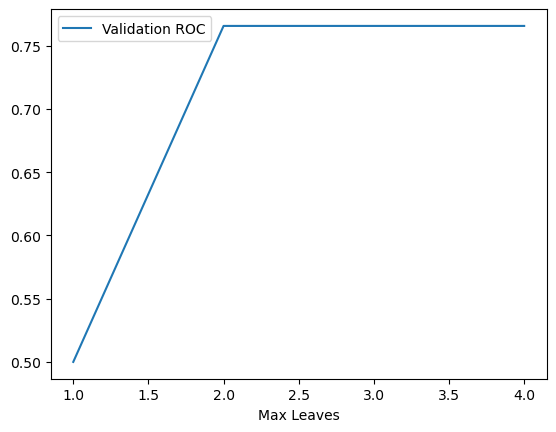

In [10]:
max_leaves_2_df.set_index('Max Leaves').plot()

In [11]:
xgb_model_4.set_params(**{'max_leaves':2})

xgb_model_4.fit(x_train_2, y_train_2, eval_set=eval_set_3, eval_metric='auc', early_stopping_rounds=30)

[0]	validation_0-auc:0.63173	validation_1-auc:0.63367
[1]	validation_0-auc:0.63173	validation_1-auc:0.63367
[2]	validation_0-auc:0.63173	validation_1-auc:0.63367
[3]	validation_0-auc:0.68027	validation_1-auc:0.68276
[4]	validation_0-auc:0.68027	validation_1-auc:0.68276
[5]	validation_0-auc:0.68027	validation_1-auc:0.68276
[6]	validation_0-auc:0.68027	validation_1-auc:0.68276
[7]	validation_0-auc:0.68027	validation_1-auc:0.68276
[8]	validation_0-auc:0.68027	validation_1-auc:0.68276
[9]	validation_0-auc:0.68027	validation_1-auc:0.68276
[10]	validation_0-auc:0.68027	validation_1-auc:0.68276
[11]	validation_0-auc:0.69696	validation_1-auc:0.69290
[12]	validation_0-auc:0.69696	validation_1-auc:0.69290
[13]	validation_0-auc:0.69696	validation_1-auc:0.69290
[14]	validation_0-auc:0.69696	validation_1-auc:0.69290
[15]	validation_0-auc:0.69696	validation_1-auc:0.69290
[16]	validation_0-auc:0.72154	validation_1-auc:0.71322
[17]	validation_0-auc:0.72154	validation_1-auc:0.71322
[18]	validation_0-au

[149]	validation_0-auc:0.76456	validation_1-auc:0.75318
[150]	validation_0-auc:0.76459	validation_1-auc:0.75315
[151]	validation_0-auc:0.76479	validation_1-auc:0.75319
[152]	validation_0-auc:0.76471	validation_1-auc:0.75313
[153]	validation_0-auc:0.76474	validation_1-auc:0.75321
[154]	validation_0-auc:0.76494	validation_1-auc:0.75315
[155]	validation_0-auc:0.76506	validation_1-auc:0.75333
[156]	validation_0-auc:0.76511	validation_1-auc:0.75343
[157]	validation_0-auc:0.76520	validation_1-auc:0.75344
[158]	validation_0-auc:0.76530	validation_1-auc:0.75353
[159]	validation_0-auc:0.76536	validation_1-auc:0.75357
[160]	validation_0-auc:0.76533	validation_1-auc:0.75355
[161]	validation_0-auc:0.76539	validation_1-auc:0.75363
[162]	validation_0-auc:0.76548	validation_1-auc:0.75379
[163]	validation_0-auc:0.76553	validation_1-auc:0.75367
[164]	validation_0-auc:0.76570	validation_1-auc:0.75360
[165]	validation_0-auc:0.76565	validation_1-auc:0.75345
[166]	validation_0-auc:0.76572	validation_1-auc:

[296]	validation_0-auc:0.77197	validation_1-auc:0.75878
[297]	validation_0-auc:0.77198	validation_1-auc:0.75889
[298]	validation_0-auc:0.77203	validation_1-auc:0.75896
[299]	validation_0-auc:0.77202	validation_1-auc:0.75891
[300]	validation_0-auc:0.77201	validation_1-auc:0.75888
[301]	validation_0-auc:0.77203	validation_1-auc:0.75876
[302]	validation_0-auc:0.77205	validation_1-auc:0.75866
[303]	validation_0-auc:0.77205	validation_1-auc:0.75876
[304]	validation_0-auc:0.77216	validation_1-auc:0.75895
[305]	validation_0-auc:0.77223	validation_1-auc:0.75899
[306]	validation_0-auc:0.77221	validation_1-auc:0.75899
[307]	validation_0-auc:0.77226	validation_1-auc:0.75907
[308]	validation_0-auc:0.77231	validation_1-auc:0.75909
[309]	validation_0-auc:0.77235	validation_1-auc:0.75913
[310]	validation_0-auc:0.77236	validation_1-auc:0.75917
[311]	validation_0-auc:0.77247	validation_1-auc:0.75921
[312]	validation_0-auc:0.77240	validation_1-auc:0.75917
[313]	validation_0-auc:0.77241	validation_1-auc:

[443]	validation_0-auc:0.77550	validation_1-auc:0.76227
[444]	validation_0-auc:0.77548	validation_1-auc:0.76237
[445]	validation_0-auc:0.77554	validation_1-auc:0.76238
[446]	validation_0-auc:0.77556	validation_1-auc:0.76243
[447]	validation_0-auc:0.77557	validation_1-auc:0.76244
[448]	validation_0-auc:0.77555	validation_1-auc:0.76243
[449]	validation_0-auc:0.77557	validation_1-auc:0.76243
[450]	validation_0-auc:0.77559	validation_1-auc:0.76241
[451]	validation_0-auc:0.77564	validation_1-auc:0.76247
[452]	validation_0-auc:0.77571	validation_1-auc:0.76254
[453]	validation_0-auc:0.77571	validation_1-auc:0.76251
[454]	validation_0-auc:0.77573	validation_1-auc:0.76256
[455]	validation_0-auc:0.77575	validation_1-auc:0.76257
[456]	validation_0-auc:0.77573	validation_1-auc:0.76249
[457]	validation_0-auc:0.77580	validation_1-auc:0.76264
[458]	validation_0-auc:0.77582	validation_1-auc:0.76254
[459]	validation_0-auc:0.77577	validation_1-auc:0.76254
[460]	validation_0-auc:0.77581	validation_1-auc:

[590]	validation_0-auc:0.77774	validation_1-auc:0.76443
[591]	validation_0-auc:0.77775	validation_1-auc:0.76436
[592]	validation_0-auc:0.77775	validation_1-auc:0.76434
[593]	validation_0-auc:0.77775	validation_1-auc:0.76435
[594]	validation_0-auc:0.77776	validation_1-auc:0.76438
[595]	validation_0-auc:0.77777	validation_1-auc:0.76438
[596]	validation_0-auc:0.77777	validation_1-auc:0.76435
[597]	validation_0-auc:0.77778	validation_1-auc:0.76436
[598]	validation_0-auc:0.77784	validation_1-auc:0.76444
[599]	validation_0-auc:0.77784	validation_1-auc:0.76437
[600]	validation_0-auc:0.77785	validation_1-auc:0.76438
[601]	validation_0-auc:0.77786	validation_1-auc:0.76441
[602]	validation_0-auc:0.77787	validation_1-auc:0.76441
[603]	validation_0-auc:0.77790	validation_1-auc:0.76445
[604]	validation_0-auc:0.77791	validation_1-auc:0.76446
[605]	validation_0-auc:0.77792	validation_1-auc:0.76446
[606]	validation_0-auc:0.77791	validation_1-auc:0.76449
[607]	validation_0-auc:0.77794	validation_1-auc:

[736]	validation_0-auc:0.77926	validation_1-auc:0.76526
[737]	validation_0-auc:0.77923	validation_1-auc:0.76525
[738]	validation_0-auc:0.77927	validation_1-auc:0.76524
[739]	validation_0-auc:0.77927	validation_1-auc:0.76527
[740]	validation_0-auc:0.77929	validation_1-auc:0.76526
[741]	validation_0-auc:0.77929	validation_1-auc:0.76533
[742]	validation_0-auc:0.77928	validation_1-auc:0.76532
[743]	validation_0-auc:0.77929	validation_1-auc:0.76537
[744]	validation_0-auc:0.77931	validation_1-auc:0.76534
[745]	validation_0-auc:0.77932	validation_1-auc:0.76535
[746]	validation_0-auc:0.77933	validation_1-auc:0.76534
[747]	validation_0-auc:0.77934	validation_1-auc:0.76532
[748]	validation_0-auc:0.77934	validation_1-auc:0.76531
[749]	validation_0-auc:0.77936	validation_1-auc:0.76534
[750]	validation_0-auc:0.77939	validation_1-auc:0.76537
[751]	validation_0-auc:0.77940	validation_1-auc:0.76534
[752]	validation_0-auc:0.77940	validation_1-auc:0.76538
[753]	validation_0-auc:0.77940	validation_1-auc:

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, grow_policy='lossguide', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=0, max_leaves=2, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=1000, n_jobs=-1,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='hist', use_label_encoder=False,
              validate_parameters=1, ...)

In [12]:
feature_names = ['Feature{number}'.format(number = number) for number in range(x_val_2.shape[1])]

In [13]:
x_val_2_df = pd.DataFrame(data = x_val_2, columns=feature_names)

In [14]:
x_val_2_df

,Feature0,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10,Feature11,Feature12,Feature13,Feature14,Feature15,Feature16
0,50000.0,2.0,1.0,39.0,-1.0,390.0,390.0,390.0,390.0,390.0,390.0,390.0,390.0,390.0,390.0,390.0,390.0
1,400000.0,1.0,2.0,29.0,0.0,7191.0,8856.0,6181.0,7859.0,4899.0,1466.0,2000.0,1500.0,2000.0,1000.0,500.0,1000.0
2,200000.0,2.0,2.0,26.0,0.0,22737.0,12169.0,14328.0,16222.0,9915.0,11226.0,3000.0,6000.0,3000.0,2003.0,3101.0,530.0
3,280000.0,1.0,2.0,38.0,-1.0,17878.0,14011.0,30079.0,13139.0,13989.0,15559.0,2000.0,30000.0,14000.0,1000.0,16000.0,0.0
4,80000.0,3.0,1.0,65.0,0.0,80260.0,82116.0,80299.0,81416.0,81617.0,81607.0,3750.0,3520.0,3069.0,3271.0,3262.0,3237.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4745,180000.0,1.0,1.0,30.0,0.0,116218.0,124296.0,128002.0,127286.0,119733.0,116705.0,10000.0,6007.0,4304.0,4241.0,4200.0,4250.0
4746,120000.0,2.0,2.0,24.0,0.0,69725.0,66918.0,65838.0,61527.0,59620.0,60767.0,3008.0,2319.0,2151.0,2200.0,2300.0,2100.0
4747,20000.0,4.0,2.0,26.0,0.0,20564.0,20284.0,19394.0,39950.0,0.0,0.0,3055.0,1467.0,1096.0,1000.0,0.0,0.0
4748,60000.0,2.0,2.0,26.0,0.0,58452.0,52445.0,52974.0,54589.0,59518.0,60491.0,2500.0,2000.0,2500.0,6000.0,2100.0,0.0


In [15]:
explainer = shap.explainers.Tree(xgb_model_4, data = x_val_2_df)

In [16]:
shap_values = explainer(x_val_2_df)

 97%|=================== | 4609/4750 [00:14<00:00]       

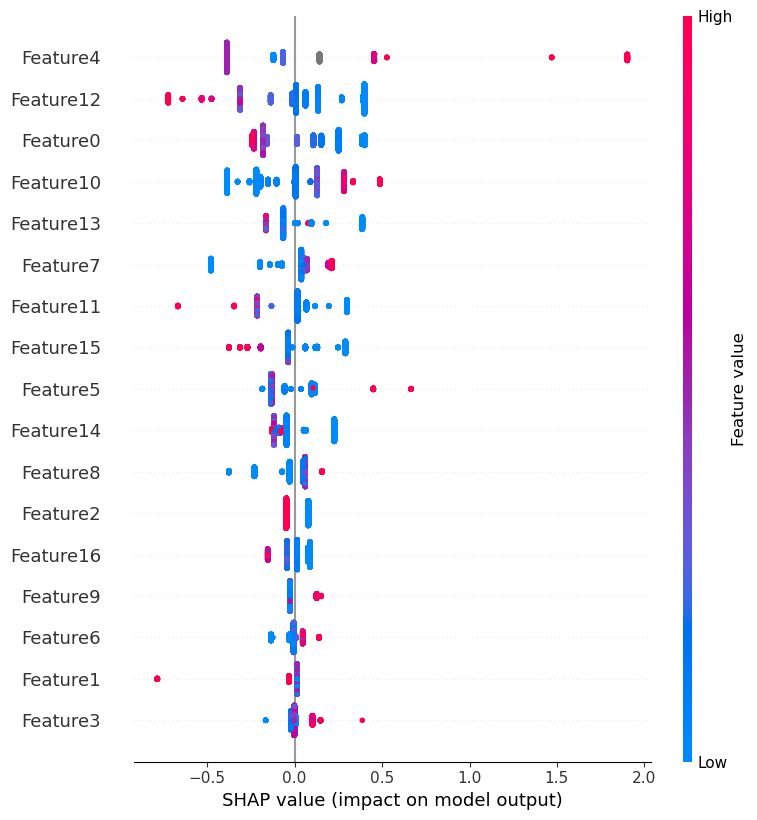

In [17]:
shap.summary_plot(shap_values.values, x_val_2_df)

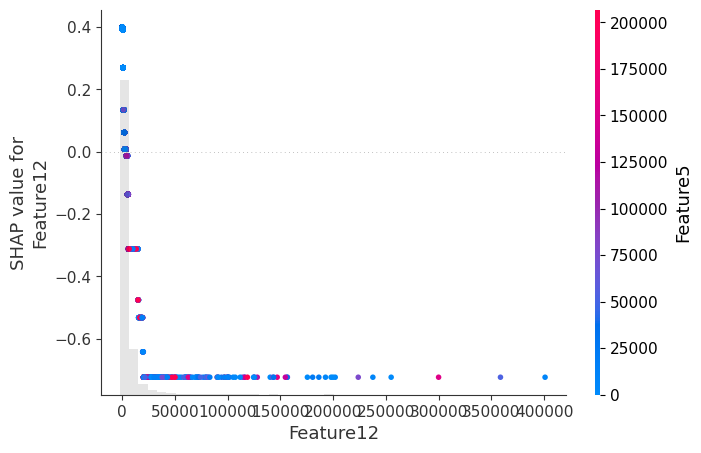

In [18]:
shap.plots.scatter(shap_values[:,'Feature12'], color = shap_values[:,'Feature5'])

In [19]:
with open('xgb_model_w_data.pkl','wb') as f:
    pickle.dump([X_train_all, y_train_all,X_test_all,y_test_all,xgb_model_4],f)

In [20]:
test_set_prob = xgb_model_4.predict_proba(X_test_all)[:,1]

In [21]:
test_auc = roc_auc_score(y_test_all, test_set_prob)
test_auc

0.7667431831352685

Text(0, 0.5, 'No of samples')

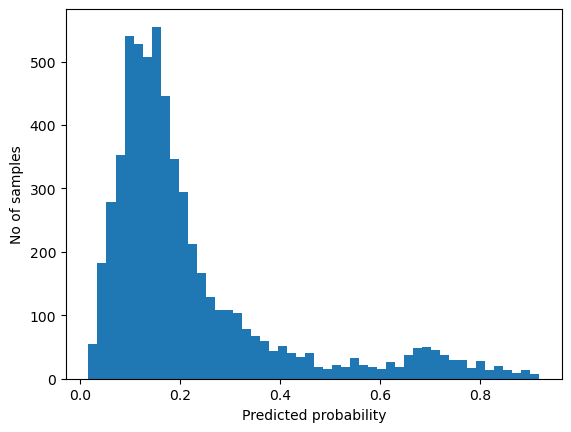

In [22]:
plt.hist(test_set_prob,bins =50)
plt.xlabel('Predicted probability')
plt.ylabel('No of samples')

In [23]:
deciles, deciles_bin_edges = pd.qcut(x = test_set_prob, q =10,retbins=True )


In [24]:
deciles_bin_edges

array([0.01606786, 0.07459729, 0.09906416, 0.11889872, 0.13980974,
       0.15920121, 0.18445068, 0.22031031, 0.29377733, 0.4754242 ,
       0.91832471])

In [25]:
test_set_df = pd.DataFrame({'Predicted Probability':test_set_prob, 'Prediction Decile':deciles, 'Outcome':y_test_all})

In [26]:
test_set_df.sample(5, random_state =10)

,Predicted Probability,Prediction Decile,Outcome
3571,0.191410,"(0.184, 0.22]",0
4792,0.399992,"(0.294, 0.475]",0
4659,0.103291,"(0.0991, 0.119]",0
2964,0.135823,"(0.119, 0.14]",0
3659,0.757928,"(0.475, 0.918]",1


In [27]:
test_set_gr = test_set_df.groupby('Prediction Decile')

In [28]:
gr_df= test_set_gr.aggregate({'Outcome':['count','mean']})
gr_df

Outcome          
                                 count      mean
Prediction Decile                               
(0.015099999999999999, 0.0746]     594  0.038721
(0.0746, 0.0991]                   594  0.087542
(0.0991, 0.119]                    594  0.095960
(0.119, 0.14]                      593  0.128162
(0.14, 0.159]                      594  0.129630
(0.159, 0.184]                     594  0.161616
(0.184, 0.22]                      593  0.200675
(0.22, 0.294]                      594  0.249158
(0.294, 0.475]                     594  0.393939
(0.475, 0.918]                     594  0.678451

In [29]:
gr_df.columns

MultiIndex([('Outcome', 'count'),
            ('Outcome',  'mean')],
           )

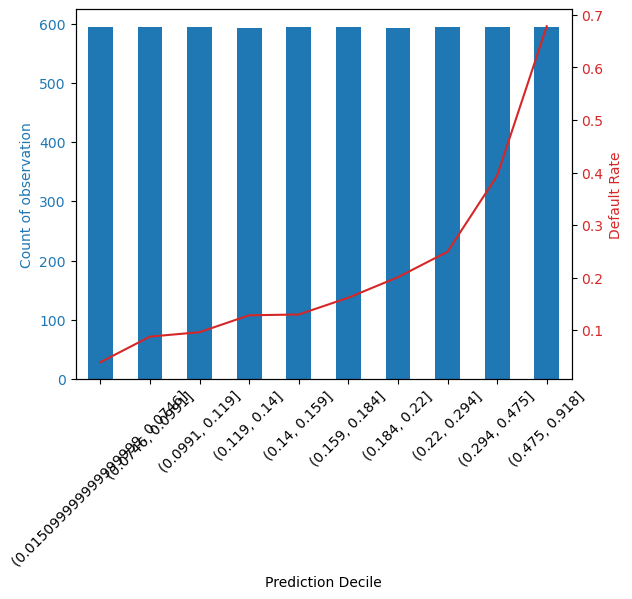

In [30]:
ax_1 = plt.axes()
color_1 = 'tab:blue'
gr_df[('Outcome','count')].plot.bar(ax = ax_1, color = color_1)
ax_1.set_ylabel('Count of observation', color = color_1)

ax_1.tick_params(axis = 'y', labelcolor = color_1)
ax_1.tick_params(axis = 'x', labelrotation = 45)

ax_2  = ax_1.twinx()
color_2 = 'tab:red'

gr_df[('Outcome','mean')].plot(ax = ax_2, color = color_2)
ax_2.set_ylabel('Default Rate', color = color_2)
ax_2.tick_params(axis = 'y', labelcolor = color_2)

In [31]:
equal_intervals, equal_interval_bin_edges = pd.cut(x = test_set_prob, bins = 5, retbins=True)


In [32]:
equal_interval_bin_edges

array([0.01516561, 0.19651923, 0.3769706 , 0.55742197, 0.73787334,
       0.91832471])

In [33]:
equal_interval_bin_edges[1:]-equal_interval_bin_edges[:-1]

array([0.18135363, 0.18045137, 0.18045137, 0.18045137, 0.18045137])

In [34]:
test_set_bins_df = pd.DataFrame({'Predicted probabilty':test_set_prob,'Prediction bin':equal_intervals,\
                                'Outcome':y_test_all})

In [35]:
test_set_bins_df.head()

,Predicted probabilty,Prediction bin,Outcome
0,0.570038,"(0.557, 0.738]",0
1,0.446433,"(0.377, 0.557]",0
2,0.111077,"(0.0152, 0.197]",0
3,0.847576,"(0.738, 0.918]",1
4,0.253749,"(0.197, 0.377]",0


In [36]:
test_set_equal_gr = test_set_bins_df.groupby('Prediction bin')

In [37]:
gr_eq_df = test_set_equal_gr.agg({'Outcome':['count','mean']})
gr_eq_df

Outcome          
                  count      mean
Prediction bin                   
(0.0152, 0.197]    3791  0.110525
(0.197, 0.377]     1330  0.279699
(0.377, 0.557]      318  0.455975
(0.557, 0.738]      318  0.663522
(0.738, 0.918]      181  0.762431

In [38]:
p = gr_eq_df[('Outcome','mean')].values
n = gr_eq_df[('Outcome','count')].values

In [39]:
std_err = np.sqrt(p*(1-p)/n)

In [40]:
std_err

array([0.00509237, 0.0123077 , 0.02792971, 0.02649674, 0.03163413])

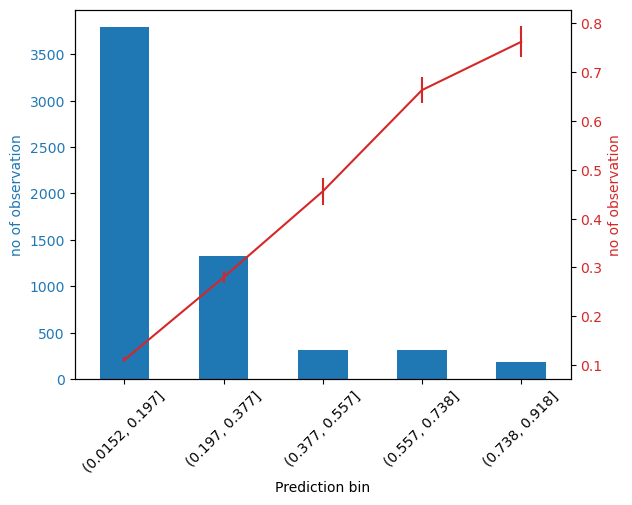

In [41]:
ax_1 = plt.axes()
color_1 = 'tab:blue'

gr_eq_df[('Outcome','count')].plot.bar(ax = ax_1, color = color_1 )
ax_1.set_ylabel('no of observation', color = color_1)
ax_1.tick_params(axis = 'y', labelcolor = color_1)
ax_1.tick_params(axis = 'x', labelrotation = 45)

ax_2 = ax_1.twinx()
color_2 = 'tab:red'

gr_eq_df[('Outcome','mean')].plot(ax = ax_2, color = color_2 ,yerr = std_err)
ax_2.set_ylabel('no of observation', color = color_2)
ax_2.tick_params(axis = 'y', labelcolor = color_2)


In [42]:
test_set_gr

In [43]:
cal_df = test_set_gr.agg({'Outcome':['count', 'mean'],'Predicted Probability':'mean'})
cal_df

Outcome           Predicted Probability
                                 count      mean                  mean
Prediction Decile                                                     
(0.015099999999999999, 0.0746]     594  0.038721              0.054535
(0.0746, 0.0991]                   594  0.087542              0.088215
(0.0991, 0.119]                    594  0.095960              0.108813
(0.119, 0.14]                      593  0.128162              0.129185
(0.14, 0.159]                      594  0.129630              0.149398
(0.159, 0.184]                     594  0.161616              0.170834
(0.184, 0.22]                      593  0.200675              0.200833
(0.22, 0.294]                      594  0.249158              0.252061
(0.294, 0.475]                     594  0.393939              0.365085
(0.475, 0.918]                     594  0.678451              0.685461

In [44]:
y_test_all.shape

(5938,)

In [45]:
cal_df[('Outcome','count')].values.sum()

5938

In [46]:
F = cal_df[('Outcome','count')].values/cal_df[('Outcome','count')].values.sum()

In [47]:
F

array([0.10003368, 0.10003368, 0.10003368, 0.09986527, 0.10003368,
       0.10003368, 0.09986527, 0.10003368, 0.10003368, 0.10003368])

In [48]:
ECE = np.sum(F*
            np.abs(cal_df[('Outcome','mean')] - cal_df[('Predicted Probability','mean')]))

In [49]:
ECE

0.009830669111908788

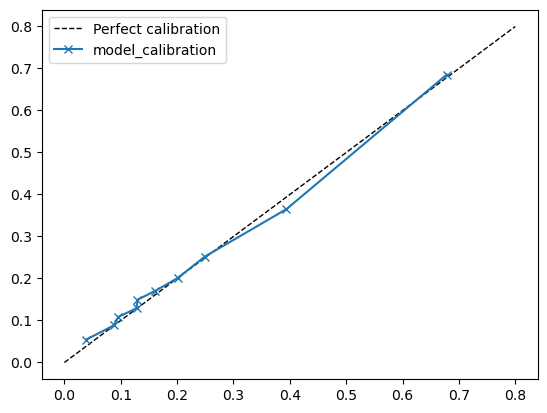

In [50]:
ax = plt.axes()
ax.plot([0,0.8],[0,0.8],'k--', linewidth = 1, label = 'Perfect calibration')

ax.plot(cal_df[('Outcome', 'mean')], cal_df[("Predicted Probability",'mean')], marker = 'x',\
           label = "model_calibration")

ax.legend()

In [51]:
from sklearn.calibration import calibration_curve

In [52]:
#calibration_curve(cal_df[('Outcome', 'mean')], (cal_df[("Predicted Probability",'mean')] , n_bins= 10)

In [53]:
thresholds = np.linspace(0,1,101)

In [54]:
#features_response[5]

In [55]:
cost_per_counseling = 7500

In [56]:
effectiveness = 0.7

In [57]:
n_pos_pred = np.empty_like(thresholds)
total_cost = np.empty_like(thresholds)
n_true_pos = np.empty_like(thresholds)
total_saving = np.empty_like(thresholds)

In [58]:
counter = 0
for threshold in thresholds:
    pos_pred = test_set_prob > threshold
    
    n_pos_pred[counter] = sum(pos_pred)
    
    total_cost[counter] = n_pos_pred[counter]*cost_per_counseling
    
    true_pos = pos_pred & y_test_all.astype(bool)
    
    n_true_pos[counter] = sum(true_pos)
    
    
    total_saving[counter] = np.sum(true_pos.astype(int)*X_test_all[:,5]*effectiveness)
    
    counter += 1

In [59]:
net_saving = total_saving -total_cost

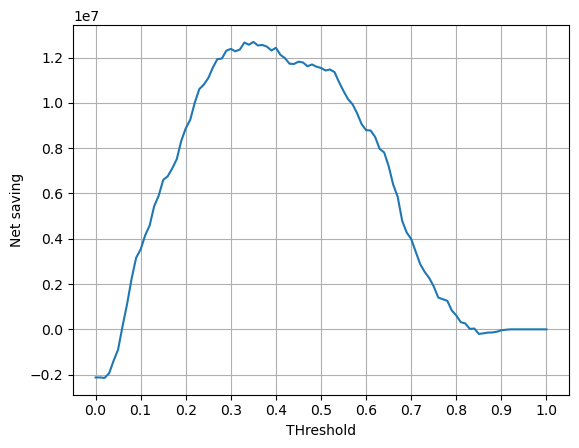

In [60]:
plt.plot(thresholds, net_saving)
plt.xlabel('THreshold')
plt.ylabel('Net saving')
plt.xticks(np.linspace(0,1,11))
plt.grid()
plt.show()

In [61]:
max_saving_idx = np.argmax(net_saving)

In [62]:
threshold_max = thresholds[max_saving_idx]
threshold_max

0.35000000000000003

In [63]:
net_saving_max = net_saving[max_saving_idx]

In [64]:
net_saving_max

12687815.100000001

In [65]:
y_test_all

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [68]:
X_test_all[:,5]

array([   776.,  49612.,  73508., ...,  50060., 100448.,      0.])

In [70]:
cost_of_defaults = np.sum(y_test_all*X_test_all[:,5])
cost_of_defaults

60587763.0

In [71]:
net_saving[max_saving_idx]/cost_of_defaults

0.20941217288382147

In [72]:
net_saving[max_saving_idx]/len(y_test_all)

2136.715240821826

In [73]:
len(y_test_all)

5938

In [74]:
sum(y_test_all)

1285

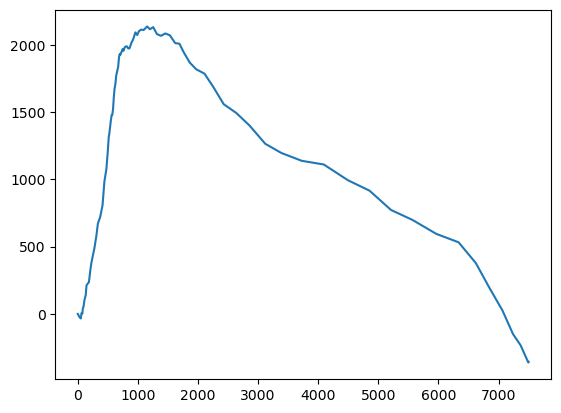

In [75]:
plt.plot(total_cost/len(y_test_all), net_saving/len(y_test_all))

Text(0, 0.5, 'Flag rate')

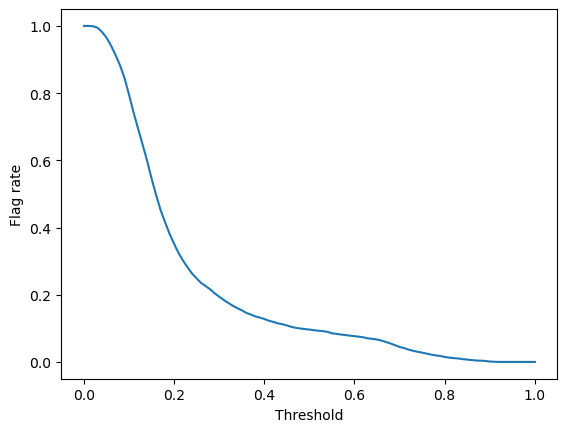

In [77]:
plt.plot(thresholds, n_pos_pred/len(y_test_all))
plt.xlabel('Threshold')
plt.ylabel('Flag rate')

invalid value encountered in true_divide


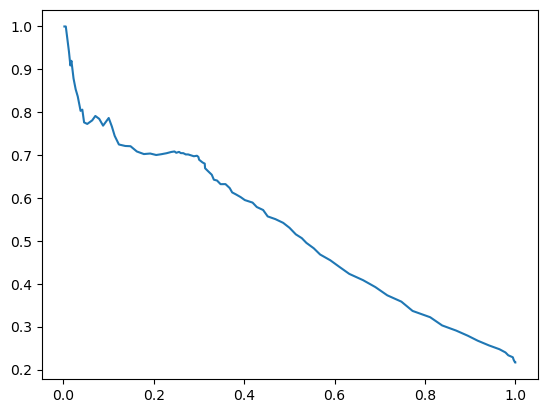

In [78]:
plt.plot(n_true_pos/sum(y_test_all), np.divide(n_true_pos, n_pos_pred))

invalid value encountered in true_divide


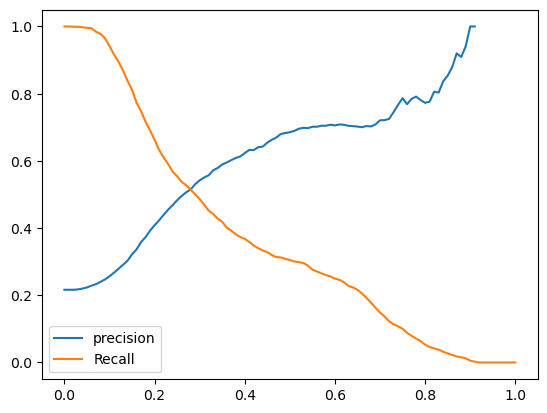

In [80]:
plt.plot(thresholds, np.divide(n_true_pos, n_pos_pred), label = 'precision')
plt.plot(thresholds, n_true_pos/sum(y_test_all), label = 'Recall' )
plt.legend()